In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm

In [26]:
data_folder = "data"
test_path = os.path.join(data_folder, "test.csv")
train_path = os.path.join(data_folder, "train.csv")

In [27]:
df_test: pd.DataFrame = pd.read_csv(test_path)
df_train: pd.DataFrame = pd.read_csv(train_path)

In [28]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Figure size 1800x800 with 0 Axes>

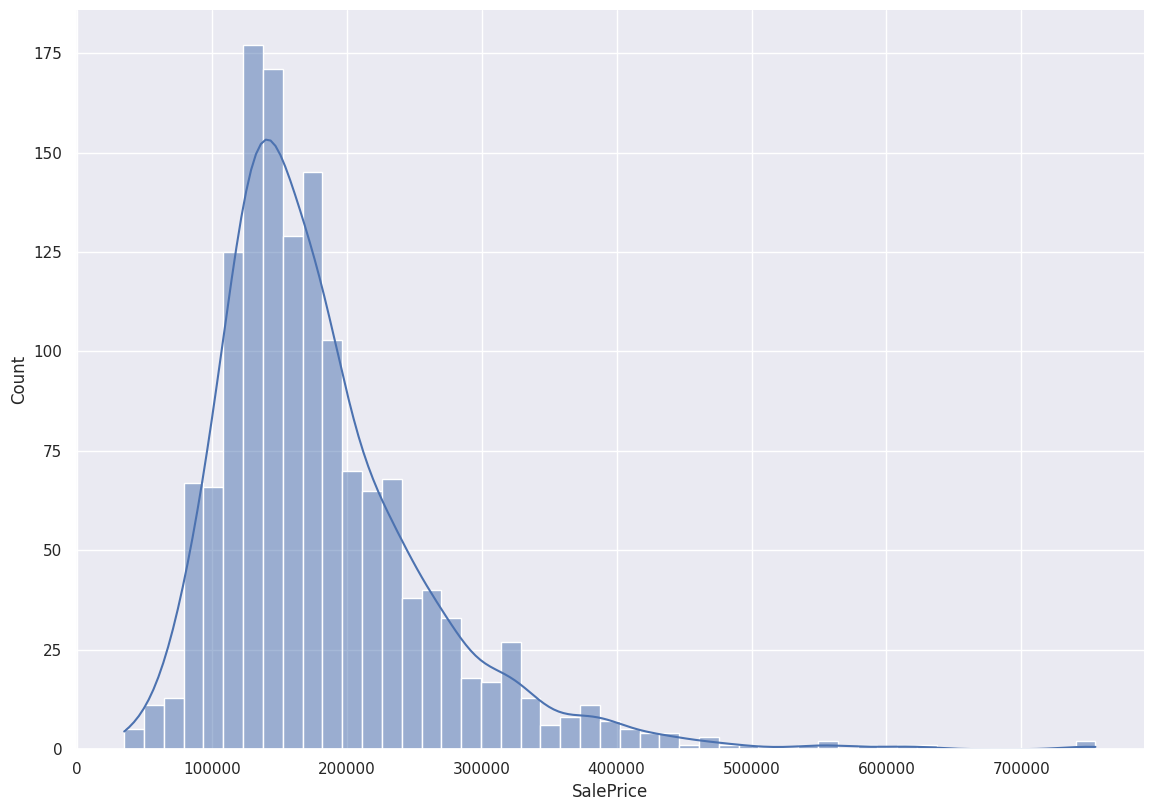

In [29]:
plt.figure(figsize=(18, 8))
sns.displot(df_train['SalePrice'], kde=True, height=8.27, aspect=11.7/8.27)

Смотрим на матрицу и на самые коррелированные

/tmp/ipykernel_9440/2706008341.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_train.corr()


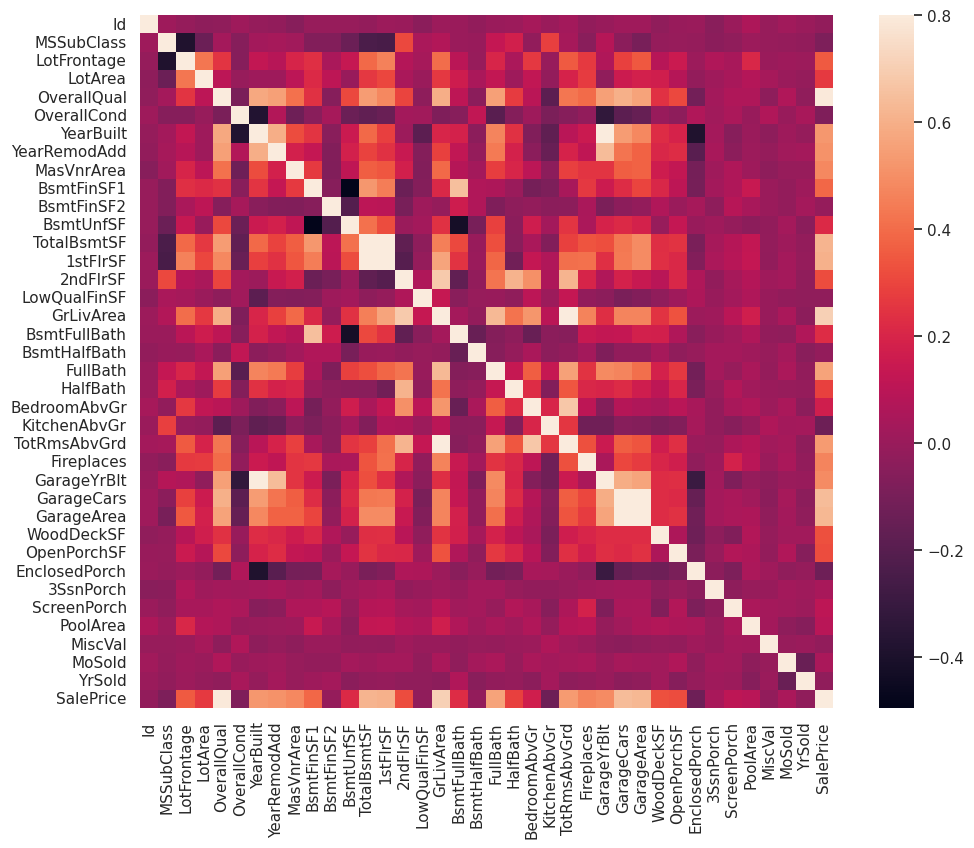

In [30]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

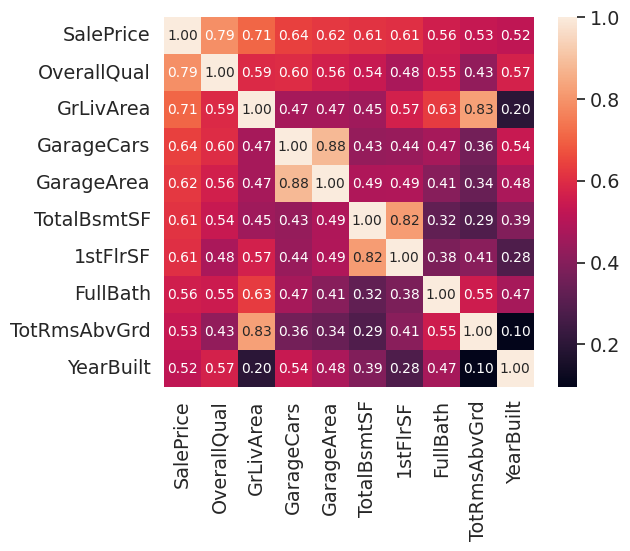

In [31]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/mnt/CommonFiles/Programming/mlcourse/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


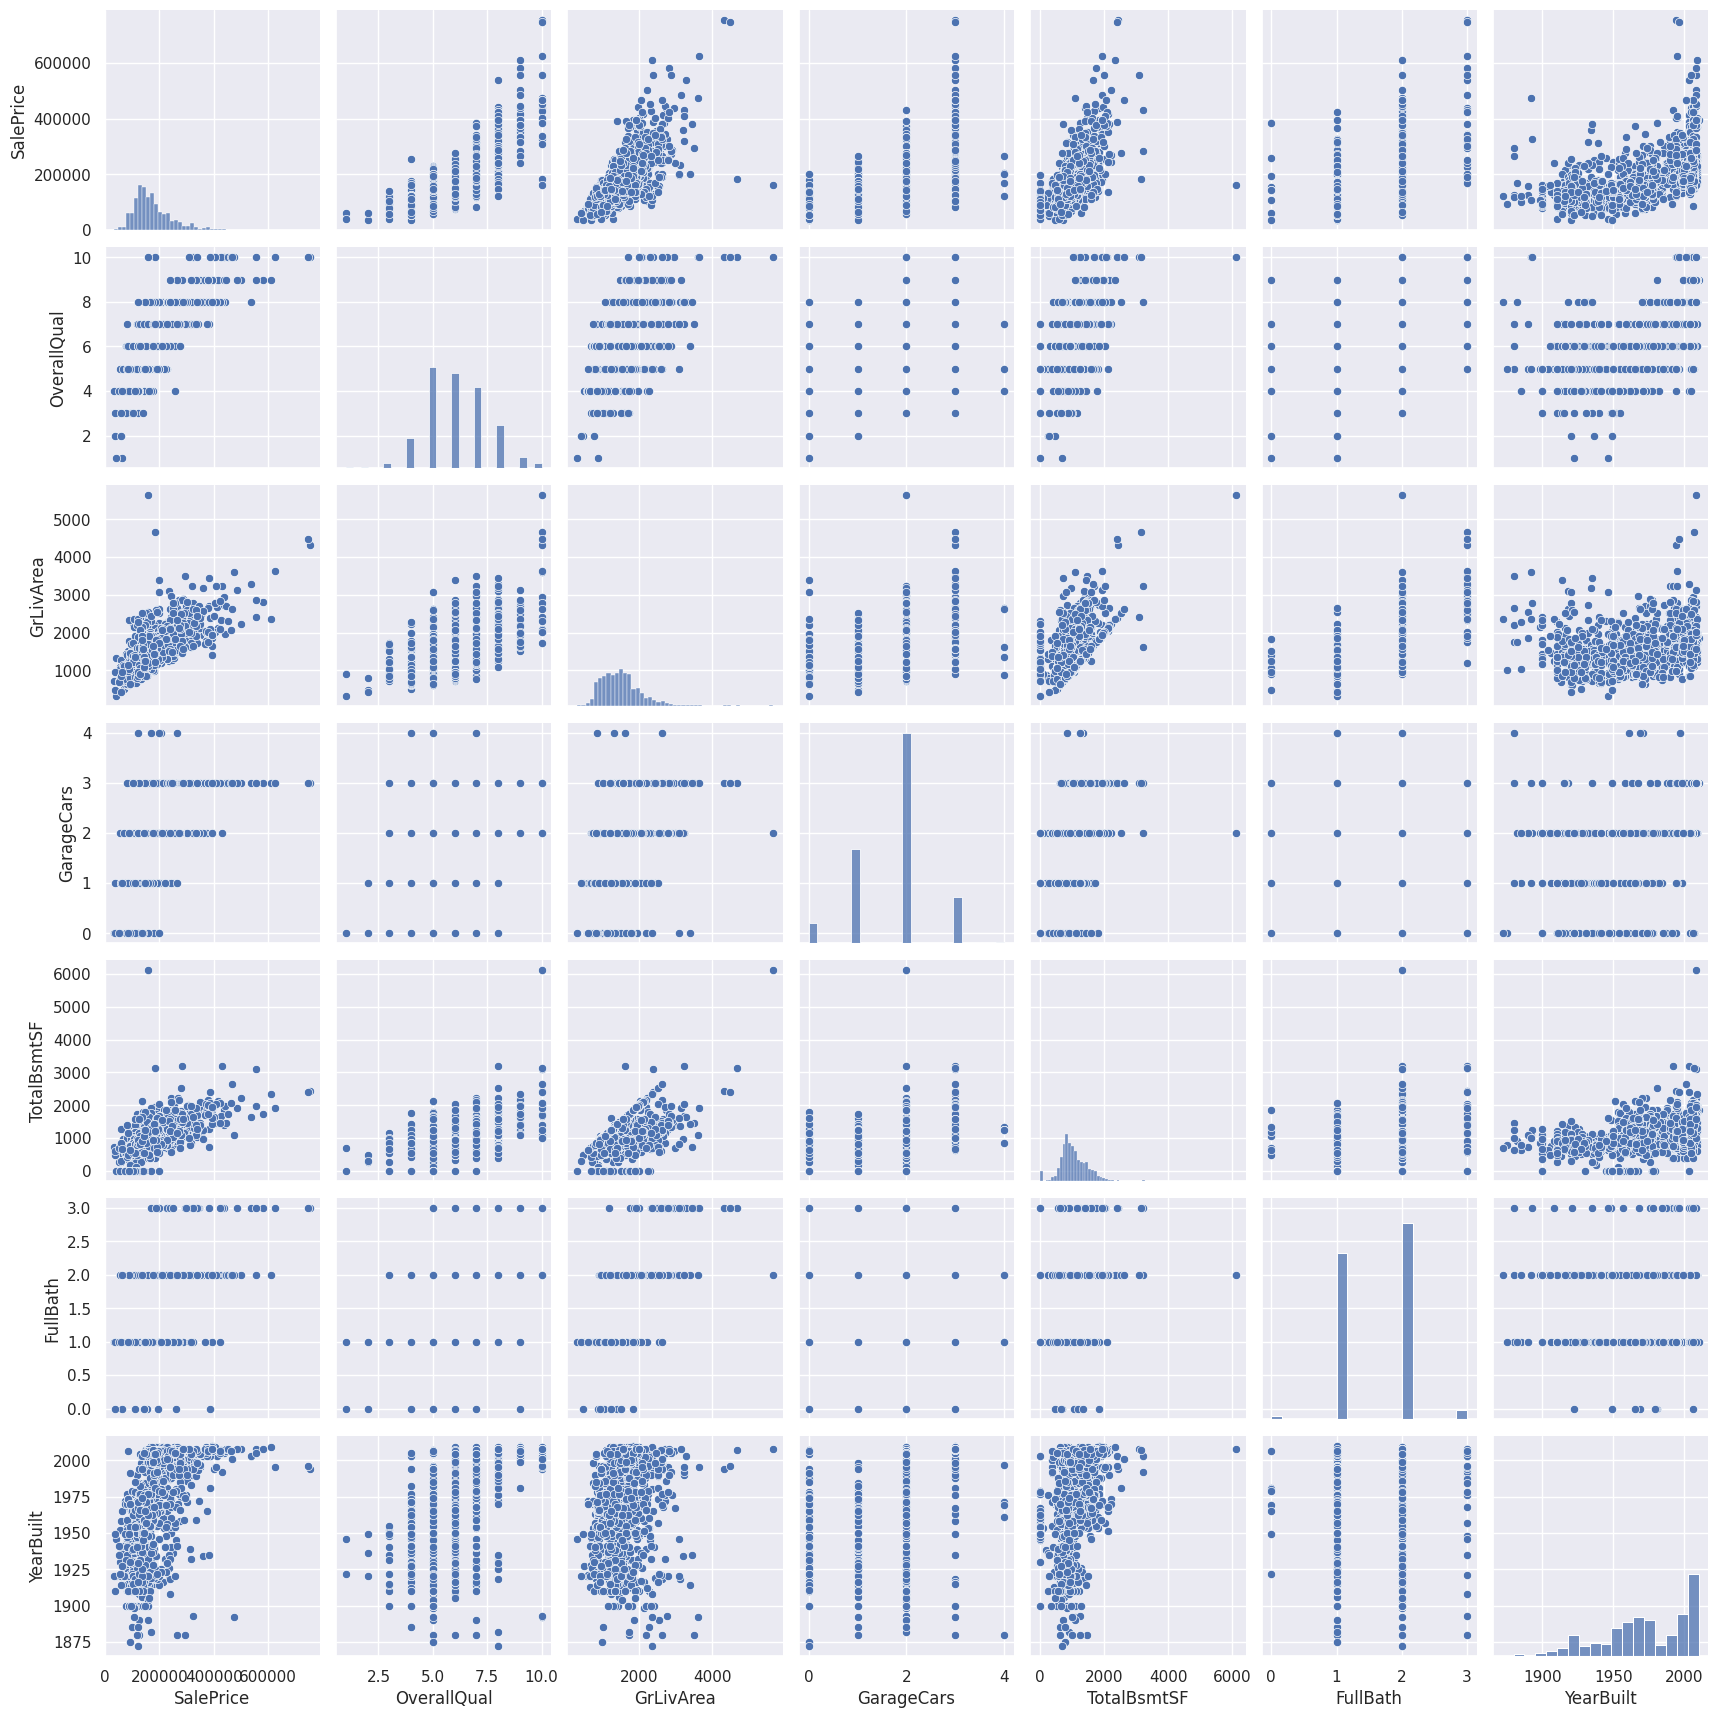

In [32]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Посмотрим на нулевые значения

In [33]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Откинеем те признаки, где много нулевых. Откинем Bsmt* и Garage* так как они коррелируют с признаками, где нет нулевых. Откинем объект, для которого Electrical = 0.

In [34]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

/tmp/ipykernel_9440/1688475366.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)


0

Выбросы. Откинем те 2 что справа

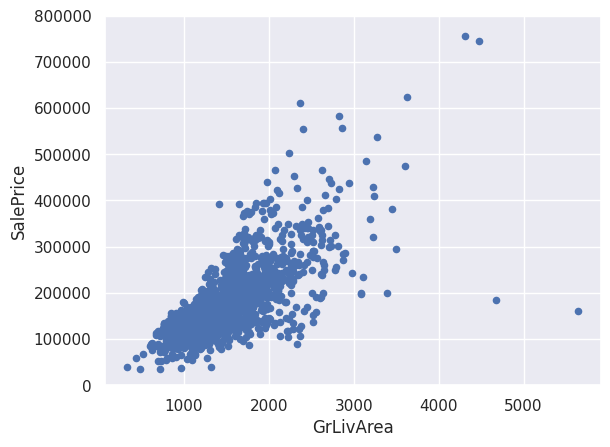

In [35]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [36]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train_ = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train_ = df_train.drop(df_train[df_train['Id'] == 524].index)

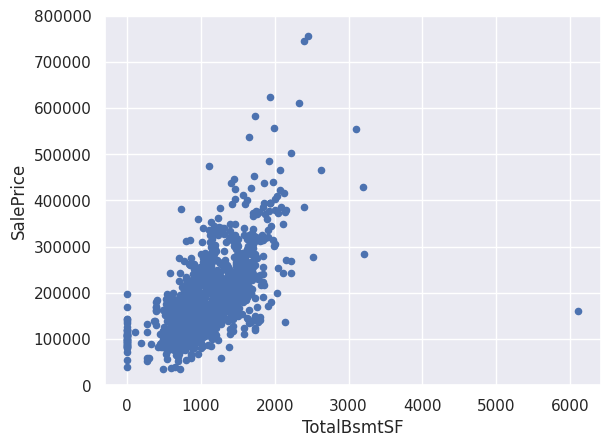

In [37]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train_['SalePrice'], df_train_[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Смотрим на распределения

In [38]:
def normal(mean, std, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = norm.pdf(x, mean, std)
    z = plt.plot(x, p, color, linewidth=2)

def plot_probability_and_density(data):
    ax = sns.histplot(x=data, stat="density")
    normal(data.mean(), data.std())
    fig = plt.figure()
    res = stats.probplot(data, plot=plt)


Приведем к нормальным

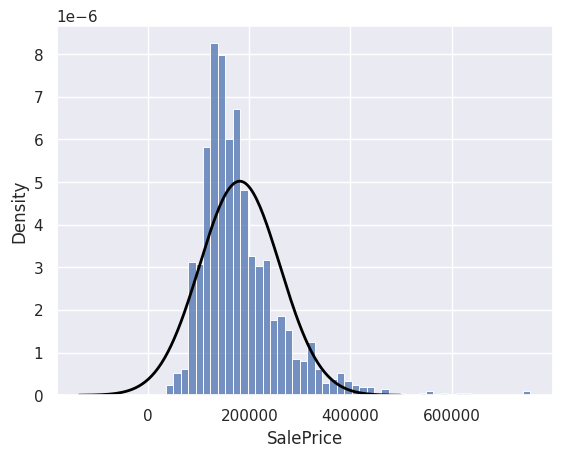

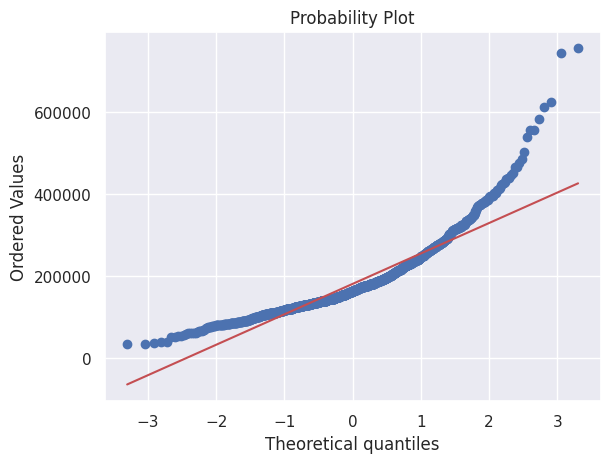

In [39]:
data = df_train['SalePrice']
plot_probability_and_density(data)

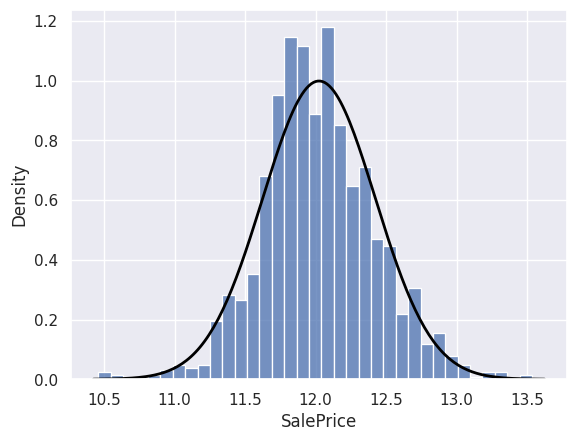

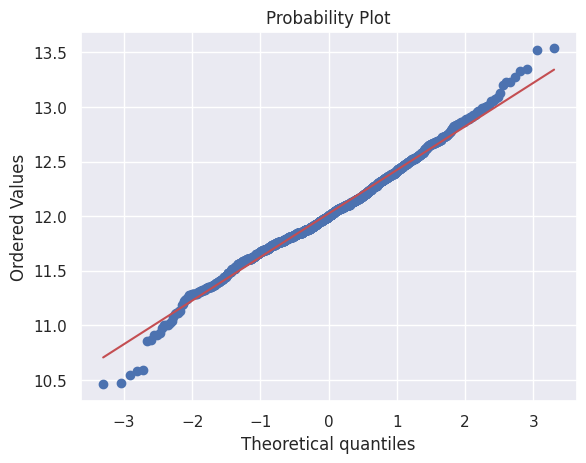

In [40]:
# applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])
data = df_train['SalePrice']
plot_probability_and_density(data)

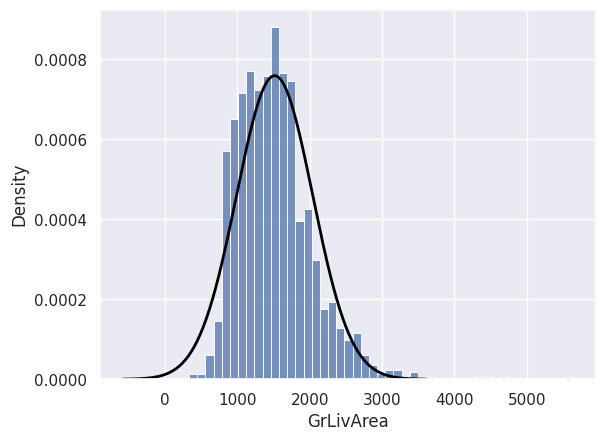

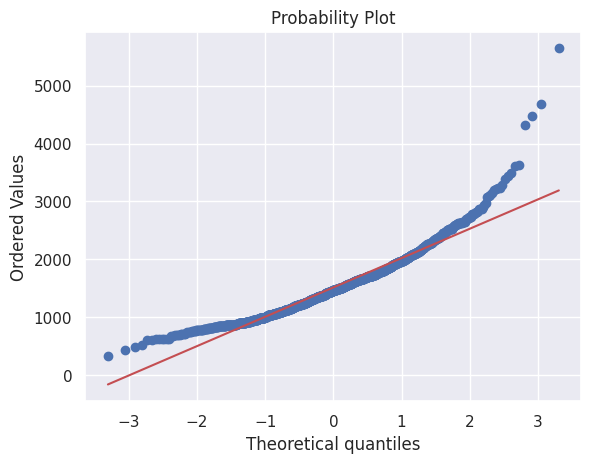

In [41]:
# for "GrLivArea"
data = df_train['GrLivArea']
plot_probability_and_density(data)


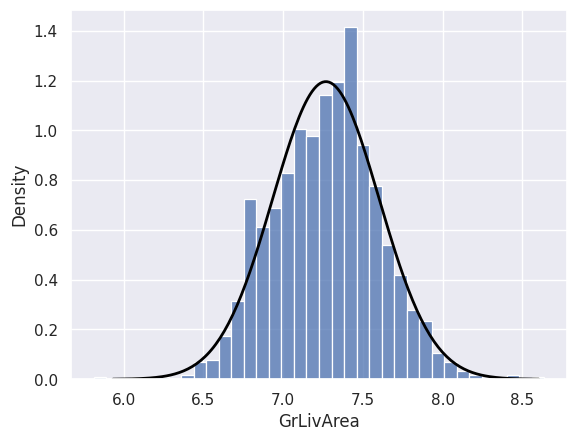

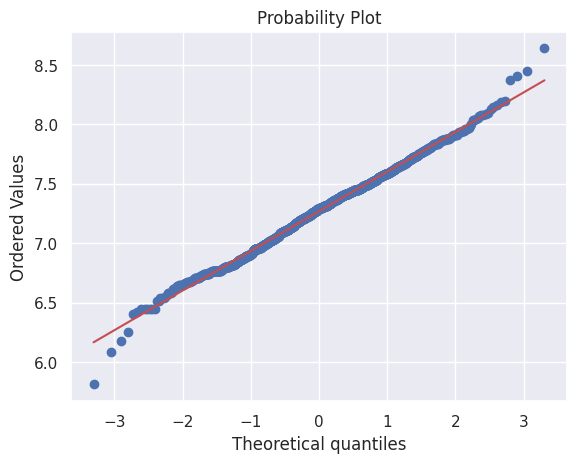

In [42]:
# applying log transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
data = df_train['GrLivArea']
plot_probability_and_density(data)


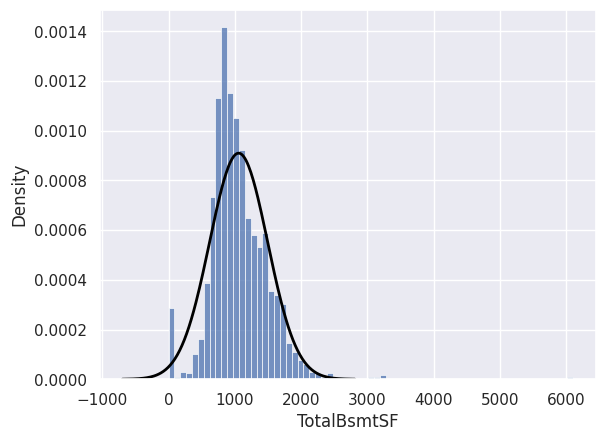

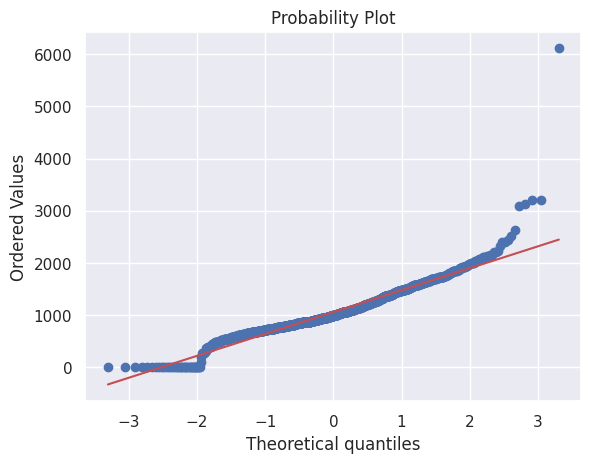

In [43]:
data = df_train['TotalBsmtSF']
plot_probability_and_density(data)

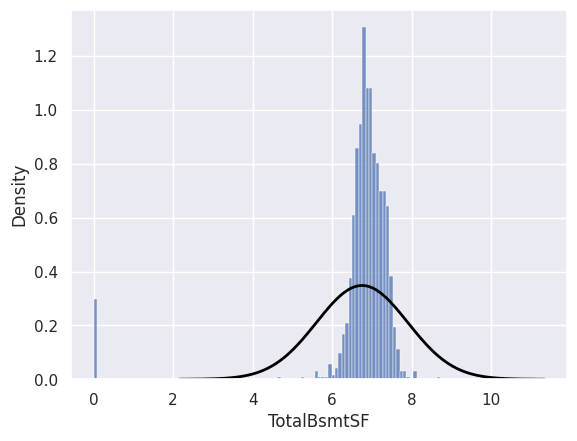

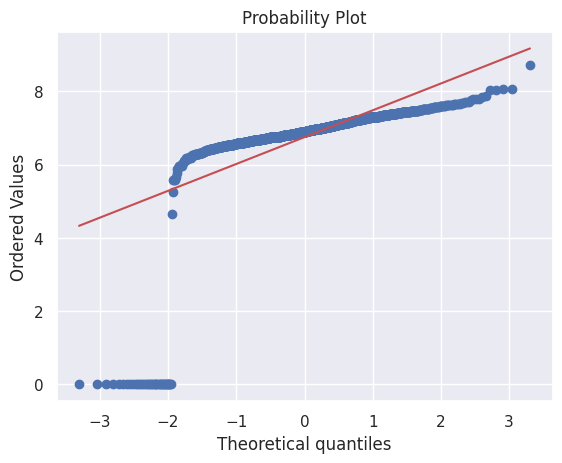

In [44]:
# applying log transformation
log_df = df_train.copy()

log_df['TotalBsmtSF'] = np.log1p(log_df['TotalBsmtSF'])
data = log_df['TotalBsmtSF']
plot_probability_and_density(data)

Есть нулевые значения => введем категориальную фичу HasBsmt

In [45]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

/mnt/CommonFiles/Programming/mlcourse/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


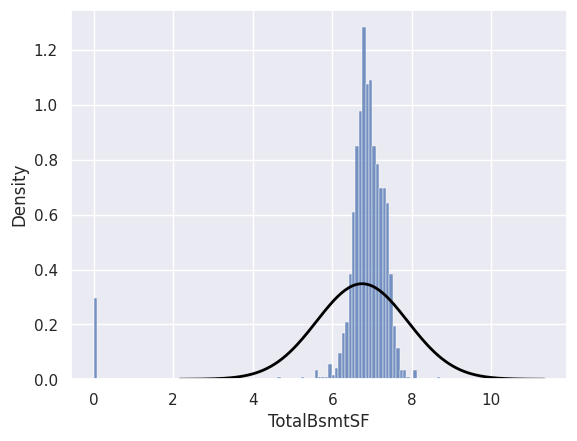

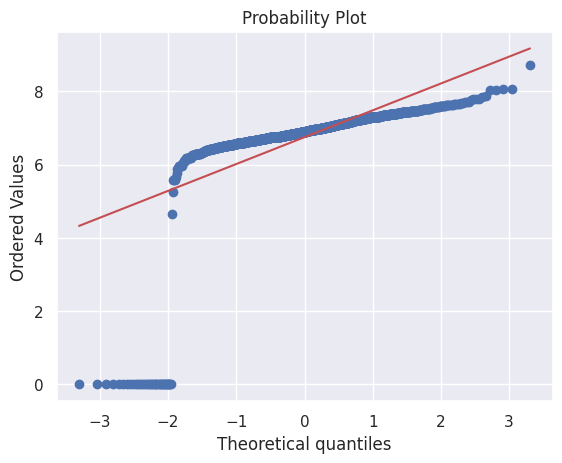

In [46]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

#histogram and normal probability plot
data = df_train['TotalBsmtSF']
plot_probability_and_density(data)

In [47]:
df_train = pd.get_dummies(df_train)